In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from datetime import datetime,date


In [2]:
#reading the csv to df
df=pd.read_csv('Customers1.csv')
df

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,07-03-1939,NaN
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9-27-1979,NaN
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5-26-1947,NaN
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9-17-1957,NaN
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11-19-1965,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Dušková,Houston,TX,Texas,77017,United States,North America,3-25-1936,NaN
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2-16-1992,NaN
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11-09-1937,NaN
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10-12-1937,NaN


In [3]:
#getting the datatype of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerKey  15266 non-null  int64  
 1   Gender       15266 non-null  object 
 2   Name         15266 non-null  object 
 3   City         15266 non-null  object 
 4   State Code   15256 non-null  object 
 5   State        15266 non-null  object 
 6   Zip Code     15266 non-null  object 
 7   Country      15266 non-null  object 
 8   Continent    15266 non-null  object 
 9   Birthday     15266 non-null  object 
 10  Age          0 non-null      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB


In [4]:
#converting the datatype of customerkey to object
df['CustomerKey'] = df['CustomerKey'].astype(object)

In [5]:
df.isnull().sum()# finding the columns with null values

CustomerKey        0
Gender             0
Name               0
City               0
State Code        10
State              0
Zip Code           0
Country            0
Continent          0
Birthday           0
Age            15266
dtype: int64

In [8]:
#calculating age from the date of birth given in column(Birthday)
def age(born): 
    born = datetime.strptime(born,"%Y-%m-%d").date()
    today = date.today() 
    return today.year - born.year - ((today.month,today.day) < (born.month,born.day)) 
  
df['Age'] = df['Birthday'].apply(age) 
  
display(df)

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Dušková,Houston,TX,Texas,77017,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,86
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,87


In [7]:
#converting the data type of birthday column for sql 
df['Birthday'] = pd.to_datetime(df['Birthday'], format='%m-%d-%Y').dt.strftime('%Y-%m-%d')

In [11]:
#filling the null values with the code already given in other columns
df['State Code'].fillna('NA',inplace=True)

In [12]:
#checking for null values after filling them
df.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
Age            0
dtype: int64

Exploratory Data Analysis-Products table

In [184]:
#finding the number of categorical and numerical variables
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent'],
      dtype='object')
Numerical Variables:
['Age']


In [59]:
#Description of Data(Exploratory Data Analysis)
df.describe(include='int')

,Age
count,15266.000000
mean,55.575920
std,19.323407
min,22.000000
25%,39.000000
50%,56.000000
75%,72.000000
max,89.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x288a4adf440>,
 'caps': [<matplotlib.lines.Line2D at 0x288a4adfa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x288a4adf140>],
 'medians': [<matplotlib.lines.Line2D at 0x288a4b18050>],
 'fliers': [<matplotlib.lines.Line2D at 0x288a4b18350>],
 'means': []}

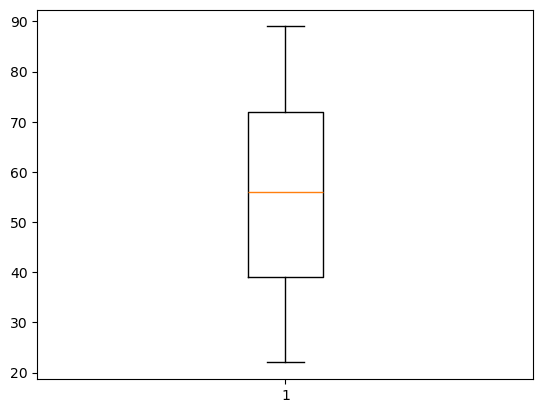

In [81]:
#plotting the box plot for detecting outliers
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])

<Axes: xlabel='Gender', ylabel='count'>

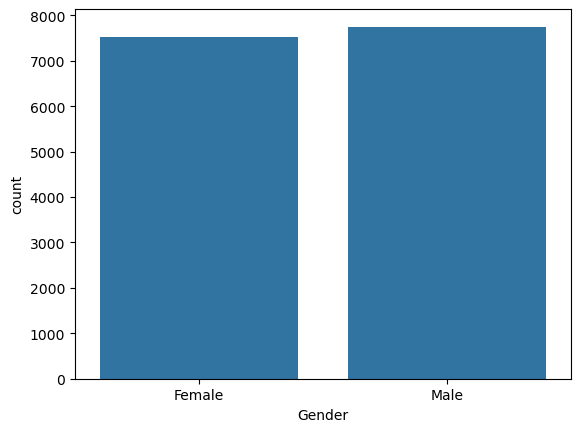

In [194]:
#plotting a countplot for finding the number of male and female
sns.countplot(df,x="Gender")

In [200]:
#calculating count from the country data
count=df['Country'].value_counts()
count

Country
United States     6828
United Kingdom    1944
Canada            1553
Germany           1473
Australia         1420
Netherlands        733
France             670
Italy              645
Name: count, dtype: int64

<Axes: >

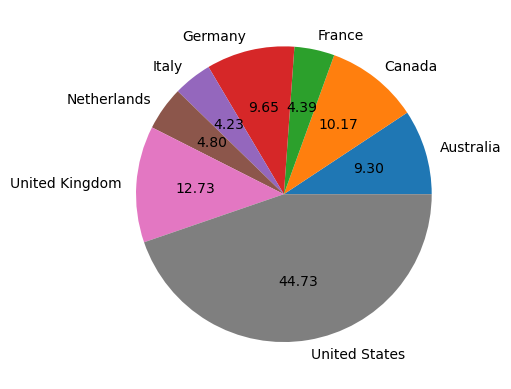

In [47]:
#constructing a pie chart to show the share of each country
df.groupby('Country').size().plot(kind='pie', autopct='%.2f')

(array([1465., 1589., 1599., 1368., 1559., 1616., 1406., 1599., 1572.,
        1493.]),
 array([22. , 28.7, 35.4, 42.1, 48.8, 55.5, 62.2, 68.9, 75.6, 82.3, 89. ]),
 <BarContainer object of 10 artists>)

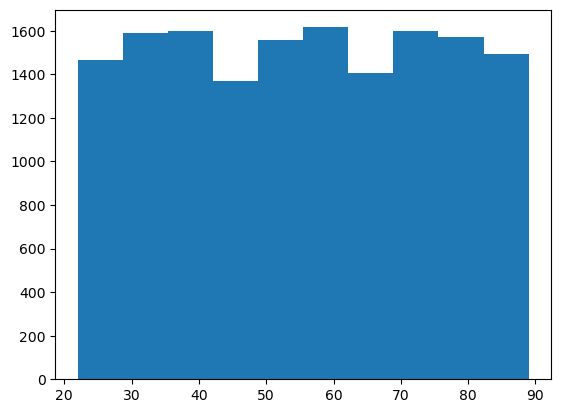

In [50]:
#plotting histogram of age
plt.hist(df['Age'])

2)sales Table

In [13]:
# uploading the sales table
df1=pd.read_csv('Sales.csv')
df1

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,01-01-2016,NaN,265598,10,1304,1,CAD
1,366001,1,01-01-2016,1-13-2016,1269051,0,1048,2,USD
2,366001,2,01-01-2016,1-13-2016,1269051,0,2007,1,USD
3,366002,1,01-01-2016,01-12-2016,266019,0,1106,7,CAD
4,366002,2,01-01-2016,01-12-2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2-20-2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2-20-2021,2-24-2021,511229,0,98,4,EUR
62881,2243032,1,2-20-2021,2-23-2021,331277,0,1613,2,CAD
62882,2243032,2,2-20-2021,2-23-2021,331277,0,1717,2,CAD


In [14]:
#finding the datatypes of the sales table
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [15]:
#finding the null values of the sales tablee
df1.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [16]:
#converting the obj type to date

df1['Order Date'] = pd.to_datetime(df1['Order Date'], format='%m-%d-%Y').dt.strftime('%Y-%m-%d')
df1['Delivery Date'] = pd.to_datetime(df1['Delivery Date'], format='%m-%d-%Y').dt.strftime('%Y-%m-%d')



In [17]:
#converting the int to object
df1['Order Number'] = df1['Order Number'].astype(object)
df1['Line Item'] = df1['Line Item'].astype(object)
df1['CustomerKey'] = df1['CustomerKey'].astype(object)
df1['StoreKey'] = df1['StoreKey'].astype(object)
df1['ProductKey'] = df1['ProductKey'].astype(object)


In [18]:
#finding the datatypes of the sales table after conversion
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  object
 1   Line Item      62884 non-null  object
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  object
 5   StoreKey       62884 non-null  object
 6   ProductKey     62884 non-null  object
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.3+ MB


In [ ]:
Exploratory Data Analysis-Sales table

In [91]:
df1.describe(include='int')# showing the descriptive statistics of the data

,Quantity
count,62884.000000
mean,3.144790
std,2.256371
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,10.000000


In [185]:
#finding the number of categorical and numerical variables
cat_cols=df1.select_dtypes(include=['object']).columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Order Number', 'Line Item', 'CustomerKey', 'StoreKey', 'ProductKey',
       'Currency Code'],
      dtype='object')
Numerical Variables:
['Quantity']


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2ea63e2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2edf18ce0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2edf1bb00>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2edf25fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2edf262d0>],
 'means': []}

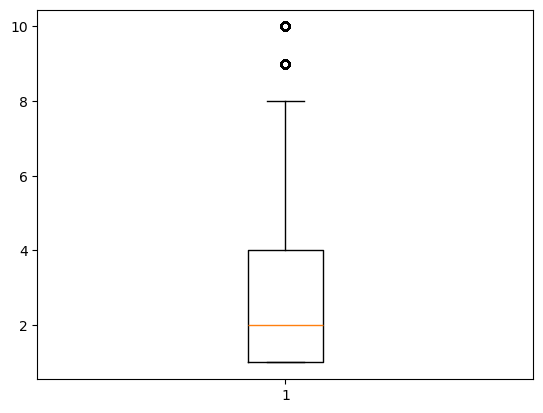

In [27]:
#finding the outliers present in the quantity column
plt.boxplot(df1['Quantity'])

In [28]:
#trying to find the upper and lower outlier
import numpy as np
Q1= np.percentile(df1['Quantity'],25)
Q3= np.percentile(df1['Quantity'],75)
IQR= Q3 -Q1
upper = df1['Quantity']>=(Q3+1.5*IQR)
print("upper bound:",upper)
upper_outliers=np.where(upper)

lower=df1['Quantity']<=(Q1-1.5*IQR)
print("Lower bound:", lower)
lower_outliers=np.where(lower)

upper bound: 0        False
1        False
2        False
3        False
4        False
         ...  
62879    False
62880    False
62881    False
62882    False
62883    False
Name: Quantity, Length: 62884, dtype: bool
Lower bound: 0        False
1        False
2        False
3        False
4        False
         ...  
62879    False
62880    False
62881    False
62882    False
62883    False
Name: Quantity, Length: 62884, dtype: bool


In [29]:
#dropping the outliers
for each in upper_outliers:
 df1['Quantity']=df1['Quantity'].drop(each)
for each in lower_outliers:
 df1['Quantity']=df1['Quantity'].drop(each)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2e5ead250>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2e5ead7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2e5eacfb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2e5eaddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2e5eae060>],
 'means': []}

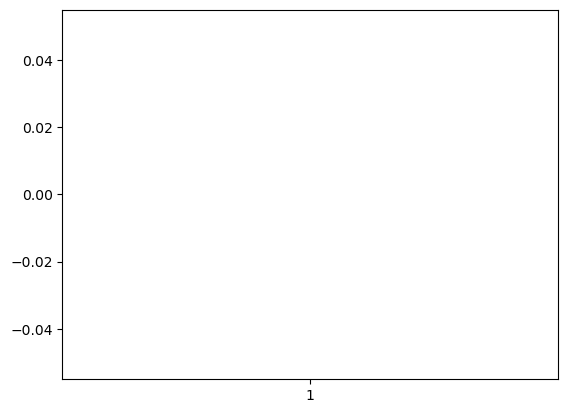

In [30]:
#checking the boxplot after detecting the outliers
plt.boxplot(df1['Quantity'])

3)Products table

In [3]:
#Reading the csv file to dataframe
df2=pd.read_csv('Products.csv')
df2

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Profit
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,NaN
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio,NaN
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio,NaN
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio,NaN
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones,NaN
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones,NaN
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones,NaN
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones,NaN


In [4]:
#calculating the profit 
df2['Profit']=df2['Unit Price USD']-df2['Unit Cost USD']
df2

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Profit
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio,6.37
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio,6.37
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio,7.12
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio,10.57
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio,10.57
...,...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones,86.92
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones,86.92
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones,1.64
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones,1.64


In [5]:
#finding the datatypes of products table
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
 10  Profit          2517 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 216.4+ KB


In [6]:
#conbverting the datatypes of productkey,categorykey and subcategorykey
df2['ProductKey'] = df2['ProductKey'].astype(object)
df2['CategoryKey'] = df2['CategoryKey'].astype(object)
df2['SubcategoryKey'] = df2['SubcategoryKey'].astype(object)


In [7]:
#checking the datatype for conversion
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   object 
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   object 
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   object 
 9   Category        2517 non-null   object 
 10  Profit          2517 non-null   float64
dtypes: float64(3), object(8)
memory usage: 216.4+ KB


In [8]:
#finding the null values of products table
df2.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Profit            0
dtype: int64

In [64]:
df2[df2.isnull().any(axis=1)]

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Profit
144,145,"Adventure Works 52"" LCD HDTV X590 Silver",Adventure Works,Silver,NaN,NaN,201,Televisions,2,TV and Video,NaN
145,146,"Adventure Works 52"" LCD HDTV X590 Black",Adventure Works,Black,NaN,NaN,201,Televisions,2,TV and Video,NaN
146,147,"Adventure Works 52"" LCD HDTV X590 White",Adventure Works,White,NaN,NaN,201,Televisions,2,TV and Video,NaN
147,148,"Adventure Works 52"" LCD HDTV X590 Brown",Adventure Works,Brown,NaN,NaN,201,Televisions,2,TV and Video,NaN
148,149,"Adventure Works 40"" LCD HDTV M690 Silver",Adventure Works,Silver,392.6,NaN,201,Televisions,2,TV and Video,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2157,2158,Adventure Works Coffee Maker Super-Auto 12C X1...,Adventure Works,Grey,NaN,NaN,805,Coffee Machines,8,Home Appliances,NaN
2163,2164,Fabrikam Coffee Maker Super-Auto 12C X125 Black,Fabrikam,Black,NaN,NaN,805,Coffee Machines,8,Home Appliances,NaN
2169,2170,Fabrikam Coffee Maker Super-Auto 12C X125 Silver,Fabrikam,Silver,NaN,NaN,805,Coffee Machines,8,Home Appliances,NaN
2175,2176,Fabrikam Coffee Maker Super-Auto 12C X125 White,Fabrikam,White,NaN,NaN,805,Coffee Machines,8,Home Appliances,NaN


In [ ]:
Exploratory Data Analysis-products table

In [54]:
#showing the statistical measures of three numerical columns
df2.describe()

,Unit Cost USD,Unit Price USD,Profit
count,2517.000000,2517.000000,2517.000000
mean,147.655562,356.830131,209.174569
std,184.373683,494.054962,316.356201
min,0.480000,0.950000,0.470000
25%,32.250000,69.000000,36.730000
50%,86.670000,199.990000,108.000000
75%,183.950000,410.000000,231.720000
max,1060.220000,3199.990000,2139.770000


In [186]:
#finding the number of categorical and numerical variables
cat_cols=df2.select_dtypes(include=['object']).columns
num_cols = df2.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'SubcategoryKey',
       'Subcategory', 'CategoryKey', 'Category'],
      dtype='object')
Numerical Variables:
['Unit Cost USD', 'Unit Price USD']


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2ef3408c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2ef340e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2ef340650>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2ef341100>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2ef341400>],
 'means': []}

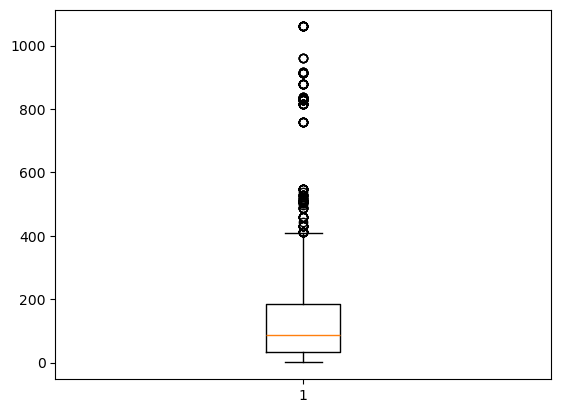

In [31]:
#detecting the outliers present in column
plt.boxplot(df2['Unit Cost USD'])


In [32]:
#to find the outliers in each row
import numpy as np
Q1= np.percentile(df2['Unit Cost USD'],25)
Q3= np.percentile(df2['Unit Cost USD'],75)
IQR= Q3 -Q1
upper = df2['Unit Cost USD']>=(Q3+1.5*IQR)
print("upper bound:",upper)
upper_outliers=np.where(upper)

lower=df2['Unit Cost USD']<=(Q1-1.5*IQR)
print("Lower bound:", lower)
lower_outliers=np.where(lower)

upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
2512    False
2513    False
2514    False
2515    False
2516    False
Name: Unit Cost USD, Length: 2517, dtype: bool
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
2512    False
2513    False
2514    False
2515    False
2516    False
Name: Unit Cost USD, Length: 2517, dtype: bool


In [33]:
#dropping the outliers
for each in upper_outliers:
 df2['Unit Cost USD']=df2['Unit Cost USD'].drop(each)
for each in lower_outliers:
 df2['Unit Cost USD']=df2['Unit Cost USD'].drop(each)


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2ef39a630>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2ef39ac00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2ef39a390>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2ef39b170>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2ef39b470>],
 'means': []}

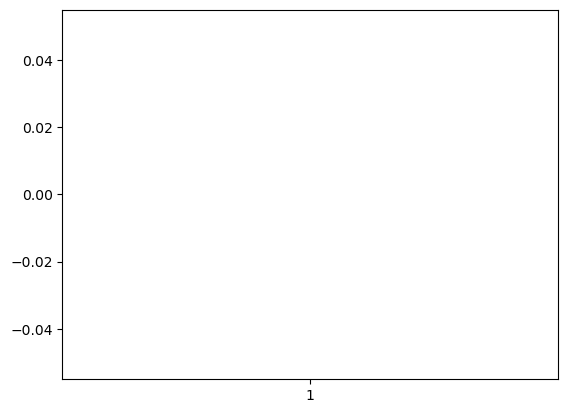

In [34]:
#Checking the outliers present in column after removing them
plt.boxplot(df2['Unit Cost USD'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2ef3d3f20>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2ef40c590>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2ef3d3bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2ef40ca40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2ef40cd10>],
 'means': []}

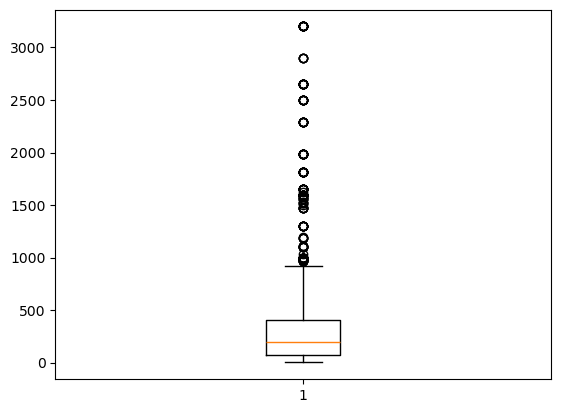

In [35]:
#detecting the outliers present in column
plt.boxplot(df2['Unit Price USD'])


In [36]:
#detecting the outliers in each row
import numpy as np
Q1= np.percentile(df2['Unit Price USD'],25)
Q3= np.percentile(df2['Unit Price USD'],75)
IQR= Q3 -Q1
upper = df2['Unit Price USD']>=(Q3+1.5*IQR)
print("upper bound:",upper)
upper_outliers=np.where(upper)

lower=df2['Unit Price USD']<=(Q1-1.5*IQR)
print("Lower bound:", lower)
lower_outliers=np.where(lower)

upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
2512    False
2513    False
2514    False
2515    False
2516    False
Name: Unit Price USD, Length: 2517, dtype: bool
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
2512    False
2513    False
2514    False
2515    False
2516    False
Name: Unit Price USD, Length: 2517, dtype: bool


In [37]:
#dropping the outliers in unit price usd column
for each in upper_outliers:
 df2['Unit Price USD']=df2['Unit Price USD'].drop(each)
for each in lower_outliers:
 df2['Unit Price USD']=df2['Unit Price USD'].drop(each)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2efacebd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2efacf170>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2eface9c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2efacf5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2efacf8c0>],
 'means': []}

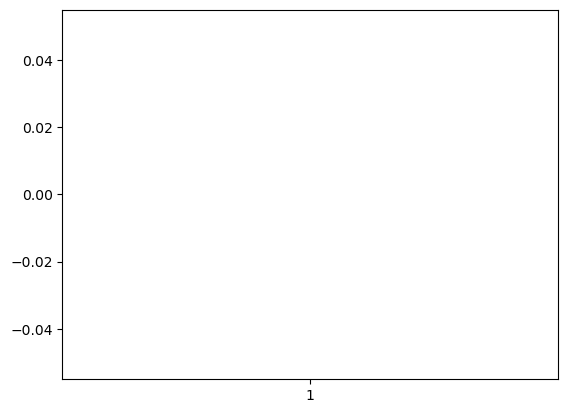

In [38]:
#Checking the outliers present in column after removing them
plt.boxplot(df2['Unit Price USD'])


<Axes: >

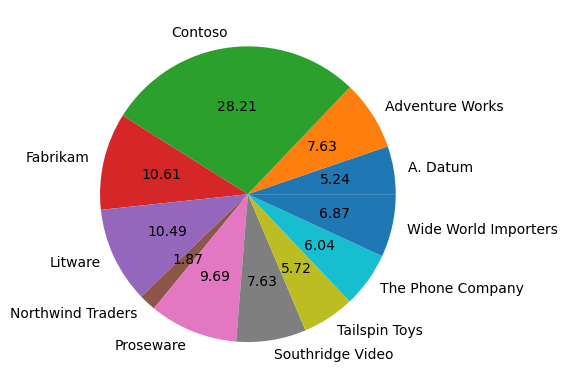

In [14]:
#constructing a pie for show the percentage of each brand
df2.groupby('Brand').size().plot(kind='pie', autopct='%.2f')

<Axes: >

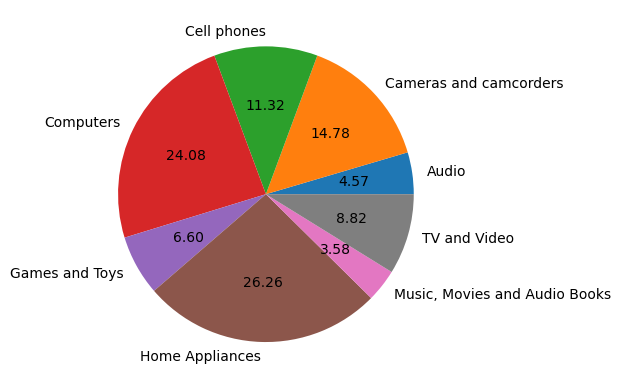

In [15]:
##constructing a pie for show the percentage of each category
df2.groupby('Category').size().plot(kind='pie',autopct='%.2f')

C:\Users\Dharshinee R\AppData\Local\Temp\ipykernel_2484\657813868.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Spectral')


<Axes: xlabel='Category'>

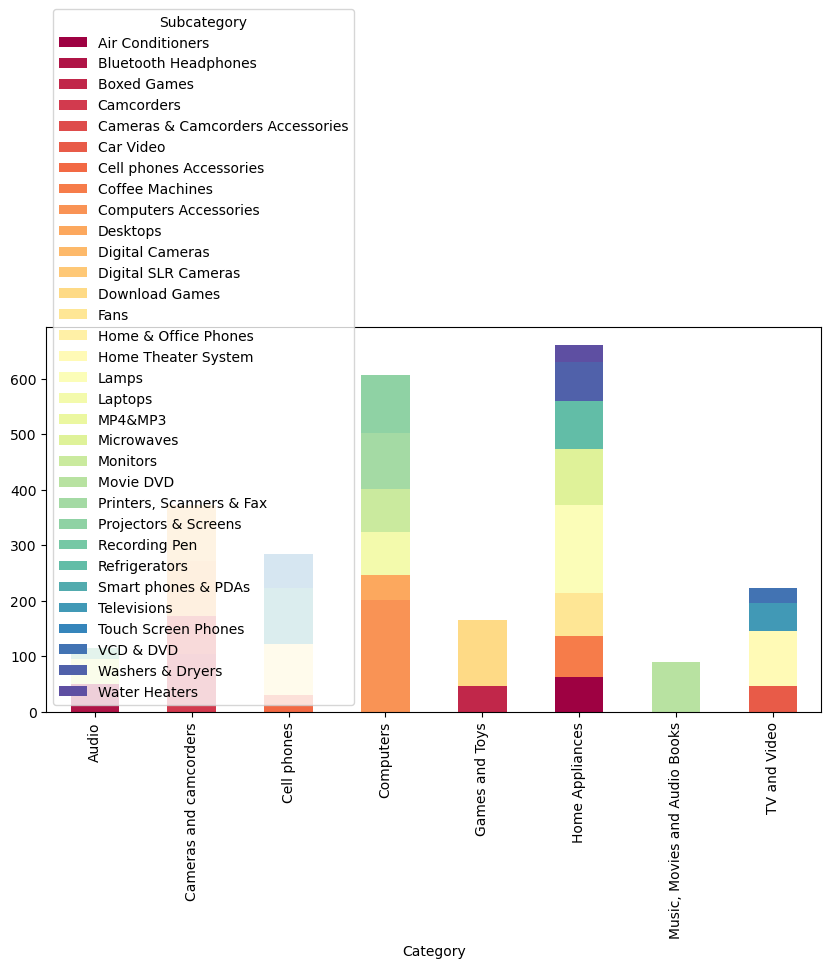

In [34]:
#construting a stacked bar chart for showing the share of each subcategor in the category
from matplotlib import cm
cmap = cm.get_cmap('Spectral') 
df2.groupby(['Category', 'Subcategory']).size().unstack().plot(kind='bar', stacked=True,figsize=(10, 5),cmap=cmap)



4)Stores table

In [21]:
#converting the csv file to dataframe for further calculation
df3=pd.read_csv('Stores.csv')
df3

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,01-01-2008
1,2,Australia,Northern Territory,665.0,01-12-2008
2,3,Australia,South Australia,2000.0,01-07-2012
3,4,Australia,Tasmania,2000.0,01-01-2010
4,5,Australia,Victoria,2000.0,12-09-2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,03-06-2008
63,64,United States,Washington DC,1330.0,01-01-2010
64,65,United States,West Virginia,1785.0,01-01-2012
65,66,United States,Wyoming,840.0,01-01-2014


In [22]:
#finding the datatypes of stores table
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [23]:
#conversion of int to obj datatype
df3['StoreKey'] = df3['StoreKey'].astype(object)

In [24]:
#converting the obj type to date type
df3['Open Date'] = pd.to_datetime(df3['Open Date'], format='%m-%d-%Y').dt.strftime('%Y-%m-%d')

In [25]:
#checking the datatypes after converting the datatype
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     object 
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.7+ KB


In [26]:
#finding the null values
df3.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [27]:
#droping null values in the same dataframe
df3.dropna(inplace=True)

In [28]:
#checking the rows having null values after droping the null values
df3.loc[df3['Square Meters'].isnull()]

,StoreKey,Country,State,Square Meters,Open Date


In [ ]:
Exploratory data analysis-stores table

In [161]:
#showing the descriptive statistics of the variable
df3.describe(include='float')

,Square Meters
count,66.000000
mean,1402.196970
std,576.404058
min,245.000000
25%,1108.750000
50%,1347.500000
75%,2000.000000
max,2105.000000


In [191]:
#finding the number of categorical and numerical variables
cat_cols=df3.select_dtypes(include=['object']).columns
num_cols = df3.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['StoreKey', 'Country', 'State', 'Open Date'], dtype='object')
Numerical Variables:
['Square Meters']


{'whiskers': [<matplotlib.lines.Line2D at 0x288a64b7080>,
 'caps': [<matplotlib.lines.Line2D at 0x288a6514980>,
 'boxes': [<matplotlib.lines.Line2D at 0x2889a4d3980>],
 'medians': [<matplotlib.lines.Line2D at 0x288a64b6330>],
 'fliers': [<matplotlib.lines.Line2D at 0x288a64b7d40>],
 'means': []}

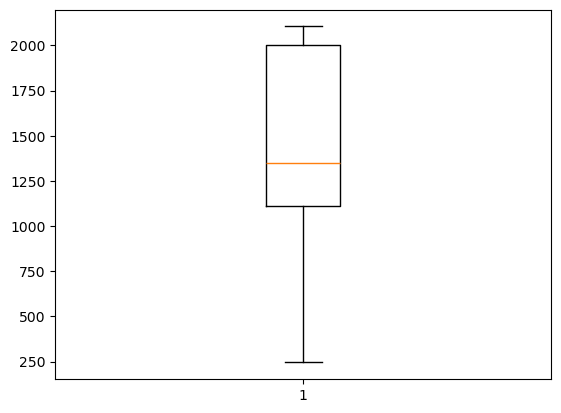

In [160]:
#checking for outliers
plt.boxplot(df3['Square Meters'])

In [31]:
df4=pd.read_csv('Exchange_Rates.csv',parse_dates=['Date'])
df4

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [33]:
#converting obj into datetime
df4['Date']=pd.to_datetime(df4['Date'],format="%m-%d-%Y").dt.strftime('%Y-%m-%d')

In [34]:
#checking the datatype after converting it 
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [35]:
df4.isnull().sum()#checking the null values after droping the values

Date        0
Currency    0
Exchange    0
dtype: int64

Exploratory Data analysis- exchange rates table

In [178]:
df4.describe(include='float')#to describe the statistical measures of the exchange column

,Exchange
count,11215.000000
mean,1.061682
std,0.245519
min,0.628500
25%,0.857800
50%,1.000000
75%,1.311900
max,1.725300


In [188]:
#finding the number of categorical and numerical variables
cat_cols=df4.select_dtypes(include=['object']).columns
num_cols = df4.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Currency'], dtype='object')
Numerical Variables:
['Exchange']


{'whiskers': [<matplotlib.lines.Line2D at 0x288a5e5eae0>,
 'caps': [<matplotlib.lines.Line2D at 0x288a5e5ea50>,
 'boxes': [<matplotlib.lines.Line2D at 0x288a5e5c9e0>],
 'medians': [<matplotlib.lines.Line2D at 0x288a5e5e930>],
 'fliers': [<matplotlib.lines.Line2D at 0x288a5ef6090>],
 'means': []}

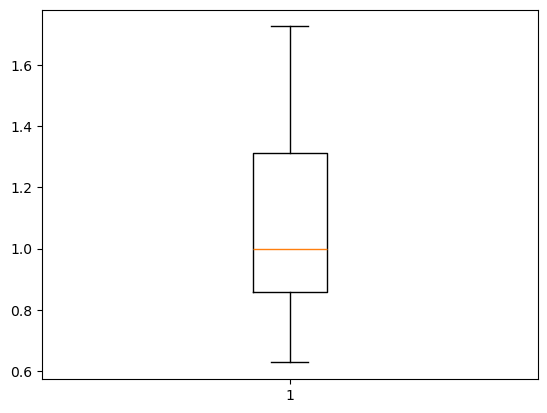

In [179]:
#plotting a box plot to detect the outliers
plt.boxplot(df4['Exchange'])

In [13]:
#connecting to mysql database
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    password="dh@rsh73",
    auth_plugin="mysql_native_password" 
)
    
mycursor=mydb.cursor()
mycursor.execute("USE DATASPARK")#connecting to the database
#creating a customers table
mycursor.execute("Create Table Customers1(customerkey varchar(250),Gender Varchar(100),Name Varchar(300),City Varchar(250),State_Code varchar(250),State Varchar(250),Zip_code Varchar(250),Country varchar(250),Continent varchar(200),Birthday DATE,Age int)")

In [14]:
#sql query to insert the data along with the parameters
insert_query = """
INSERT INTO Customers1(customerkey, Gender, Name, City, State_Code, State, Zip_code, Country, Continent, Birthday, Age)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# to insert the data in rows
data_to_insert = [tuple(row) for index, row in df.iterrows()]

# Insert data
mycursor.executemany(insert_query, data_to_insert)
mydb.commit()

In [9]:
#connecting to mysql database
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    password="dh@rsh73",
    auth_plugin="mysql_native_password" 
)
    
mycursor=mydb.cursor()
mycursor.execute("USE DATASPARK")
#creating the table products
mycursor.execute("Create Table Products(Productkey varchar(250),Product_Names Varchar(100),Brand Varchar(300),Color Varchar(250),Unit_Cost FLOAT,Unit_Price FLOAT ,SubcategoryKey Varchar(250),Subcategory varchar(350),CategoryKey varchar(200),Category Varchar(250),Profit FLOAT)")

In [10]:
#sql query to insert the data along with the parameters
insert_query = """
INSERT INTO Products(Productkey,Product_Names,Brand,Color,Unit_Cost,Unit_Price,SubcategoryKey,Subcategory,CategoryKey,Category,Profit)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# to insert the data in rows
data_to_insert = [tuple(row) for index, row in df2.iterrows()]

# Insert data
mycursor.executemany(insert_query, data_to_insert)
mydb.commit()

In [11]:
#connecting to mysql database
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    password="dh@rsh73",
    auth_plugin="mysql_native_password" 
)
    
mycursor=mydb.cursor()
mycursor.execute("USE DATASPARK")
#creating the table sales1
mycursor.execute("Create Table Sales(Order_Number varchar(250),Line_item Varchar(100),Order_date DATE,Delivery_date DATE,customerkey varchar(250),Storekey varchar(200),Productkey varchar(250),Quantity INT,Currency_Code Varchar(250))")

In [19]:
df1 = df1.where(pd.notnull(df1), None)#to convert the nan values to none 

In [20]:
#sql query to insert the data along with the parameters
insert_query = """
INSERT INTO Sales(Order_Number,Line_item, Order_date, Delivery_date,customerkey,Storekey,Productkey,Quantity,Currency_Code)
VALUES (%s, %s, %s, %s, %s, %s,%s, %s, %s)
"""

#to insert the data in rows
data_to_insert = [tuple(row) for index, row in df1.iterrows()]

# Insert data
mycursor.executemany(insert_query, data_to_insert)
mydb.commit()

In [29]:
#connecting to mysql database
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    password="dh@rsh73",
    auth_plugin="mysql_native_password" 
)
    
mycursor=mydb.cursor()
mycursor.execute("USE DATASPARK")
#creating the table stores
mycursor.execute("Create Table Stores(Storekey varchar(200), Country Varchar(250),State varchar (250),Square_meters FLOAT,Open_date DATE)")

In [30]:
#sql query to insert the data along with the parameters
insert_query = """
INSERT INTO Stores(Storekey,Country,State,Square_meters,Open_date)
VALUES (%s, %s, %s, %s, %s)
"""

#to insert the data in rows
data_to_insert = [tuple(row) for index, row in df3.iterrows()]

# Insert data
mycursor.executemany(insert_query, data_to_insert)
mydb.commit()

In [36]:
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    password="dh@rsh73",
    auth_plugin="mysql_native_password" 
)
    
mycursor=mydb.cursor()
mycursor.execute("USE DATASPARK")
#creating the table Exchange Rates
mycursor.execute("Create Table Exchange_Rates(DATES DATE, Currency Varchar(250),Exchange FLOAT)")
#sql query to insert the data along with the parameters

insert_query = """
INSERT INTO Exchange_Rates(Dates,Currency,Exchange)
VALUES (%s, %s, %s)
"""

#to insert the data in rows
data_to_insert = [tuple(row) for index, row in df4.iterrows()]

# Insert data
mycursor.executemany(insert_query, data_to_insert)
mydb.commit()